# Naudojamos bibliotekos:

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
failo_kelias = r"C:\Users\Paulius\Duomenu mokslas\projektas_US_rinkimai\1976-2020-senate.csv"
senato_duomenys = pd.read_csv(failo_kelias)

In [ ]:
# Aprašome visus skaitinius stulpelius
print("Senato skaitinių stulpelių aprašymas:")
skaitiniu_aprasymas = senato_duomenys.describe()
print(skaitiniu_aprasymas)

# Aprašome visus tekstinius ir kategorinius stulpelius
print("\nSenato tekstinių ir kategorinių stulpelių apžvalga:")
tekstiniai_kategoriniai_stulpeliai = senato_duomenys.select_dtypes(include=["object"]).columns
for stulpelis in tekstiniai_kategoriniai_stulpeliai:
    print(f"\nStulpelis: {stulpelis}")
    print(f"Unikalios reikšmės: {senato_duomenys[stulpelis].nunique()}")
    print(f"Dažniausios reikšmės:\n{senato_duomenys[stulpelis].value_counts().head(5)}")

Senato skaitinių stulpelių aprašymas:
              year   state_fips    state_cen     state_ic  candidatevotes  \
count  3629.000000  3629.000000  3629.000000  3629.000000    3.629000e+03   
mean   2000.074952    28.774594    53.245798    39.212180    4.091224e+05   
std      13.248282    15.445976    25.871293    22.566908    7.789137e+05   
min    1976.000000     1.000000    11.000000     1.000000    1.000000e+00   
25%    1990.000000    17.000000    33.000000    21.000000    4.774000e+03   
50%    2002.000000    29.000000    54.000000    42.000000    5.470100e+04   
75%    2012.000000    41.000000    74.000000    56.000000    4.766040e+05   
max    2021.000000    56.000000    95.000000    82.000000    7.864624e+06   

         totalvotes     version  partija_numeric  rinkejų_aktyvumas  \
count  3.629000e+03      3629.0      3629.000000       3.629000e+03   
mean   2.218922e+06  20210114.0         1.788923       2.179664e-01   
std    2.116732e+06         0.0         1.235312       

# Skaitiniai stulpeliai

### 1. Kandidato balsai (candidatevotes)
Kandidatų balsų diapazonas labai platus: nuo keleto iki beveik 8 mln.
Mediana (54,701) ji rodo, kad dauguma kandidatų surenka santykinai nedaug balsų.

In [7]:
# Pakeičiame mokslinę notaciją į standartinę
pd.options.display.float_format = "{:,.0f}".format
print(senato_duomenys["candidatevotes"].describe())

count       3,629
mean      409,122
std       778,914
min             1
25%         4,774
50%        54,701
75%       476,604
max     7,864,624
Name: candidatevotes, dtype: float64


### 2. Bendras balsų skaičius (totalvotes)
Maksimalus bendras balsų skaičius (12,578,510) jis nurodo didelį rinkėjų aktyvuma Kalifornijos valstijoje.

In [8]:
pd.options.display.float_format = "{:,.0f}".format
print(senato_duomenys["totalvotes"].describe())

count        3,629
mean     2,218,922
std      2,116,732
min              1
25%        692,350
50%      1,567,181
75%      2,948,741
max     12,578,511
Name: totalvotes, dtype: float64


### 3. Valstijos lygio valdžia (Valstijos lygio valdžia)
Šis stulpelis atspindi kiek valstijos tarnybose dirba gyventojų.
Dauguma valstijų turi mažesnį aktyvumą šioje kategorijoje, tačiau kai kuriose jis labai didelis (pvz., Kalifornija, Niujorkas).

In [10]:
pd.options.display.float_format = "{:,.0f}".format
print(senato_duomenys["Valstijos lygio valdžia"].describe())

count     3,401
mean     47,543
std      53,111
min           0
25%       6,036
50%      25,311
75%      78,506
max     239,387
Name: Valstijos lygio valdžia, dtype: float64


# Tekstiniai stulpeliai

### Valstija (state) ir jos kodas (state_po)
Unikalios reikšmės: 50 (atitinka visas JAV valstijas)

### Etapas (stage)
Unikalios reikšmės: 3 (gen, pre, runoff)

Dažniausios reikšmės:
gen (bendrieji rinkimai): 3,616 kartų

pre (pirminiai rinkimai): 9 kartų

runoff (papildomi rinkimai): 4 kartų

Didžioji dalis duomenų yra iš bendrųjų rinkimų, o kiti etapai, pvz., pirminiai ar papildomi rinkimai, pasitaiko daug rečiau.

### Detali partijos informacija (party_detailed)
Dažniausios reikšmės:

Respublikonai: 802 kartų

Demokratai: 798 kartų

Liberalai: 361 kartų

Nepriklausomi: 280 kartų

Respublikonai ir demokratai aiškiai užima pagrindines pozicijas, tačiau yra reikšminga ir trečiųjų partijų įtaka.

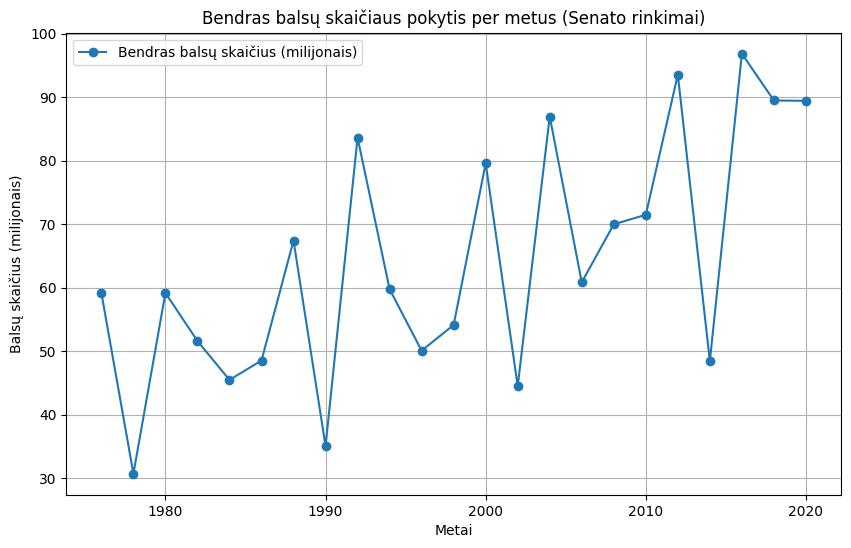

In [15]:
# Filtruojame duomenis, kad būtų tik iki 2020 metų
senato_duomenys_iki_2020 = senato_duomenys[senato_duomenys["year"] <= 2020]

# Skaičiuojame bendrą kandidatų balsų skaičių per metus
balsai_pagal_kandidatus = senato_duomenys_iki_2020.groupby("year")["candidatevotes"].sum()
balsai_pagal_kandidatus_milijonais = balsai_pagal_kandidatus / 1e6

# Vizualizacija
plt.figure(figsize=(10, 6))
plt.plot(balsai_pagal_kandidatus_milijonais.index, balsai_pagal_kandidatus_milijonais.values, marker="o", label="Bendras balsų skaičius (milijonais)")
plt.title("Bendras balsų skaičiaus pokytis per metus (Senato rinkimai)")
plt.xlabel("Metai")
plt.ylabel("Balsų skaičius (milijonais)")
plt.grid()
plt.legend()
plt.show()


Balsų skaičius stabiliai didėjo nuo 1990-ųjų, su pastebimais pikais prezidento rinkimų metais (pvz., 2008, 2016, 2020).
Tarpinių rinkimų metais (pvz., 2014) balsų skaičius sumažėja dėl mažesnio rinkėjų aktyvumo.

Rinkėjų aktyvumas Senato rinkimuose didėja per svarbesnius rinkimus.

Pikų priežastis – didesnė konkurencija ir prezidento rinkimų poveikis.

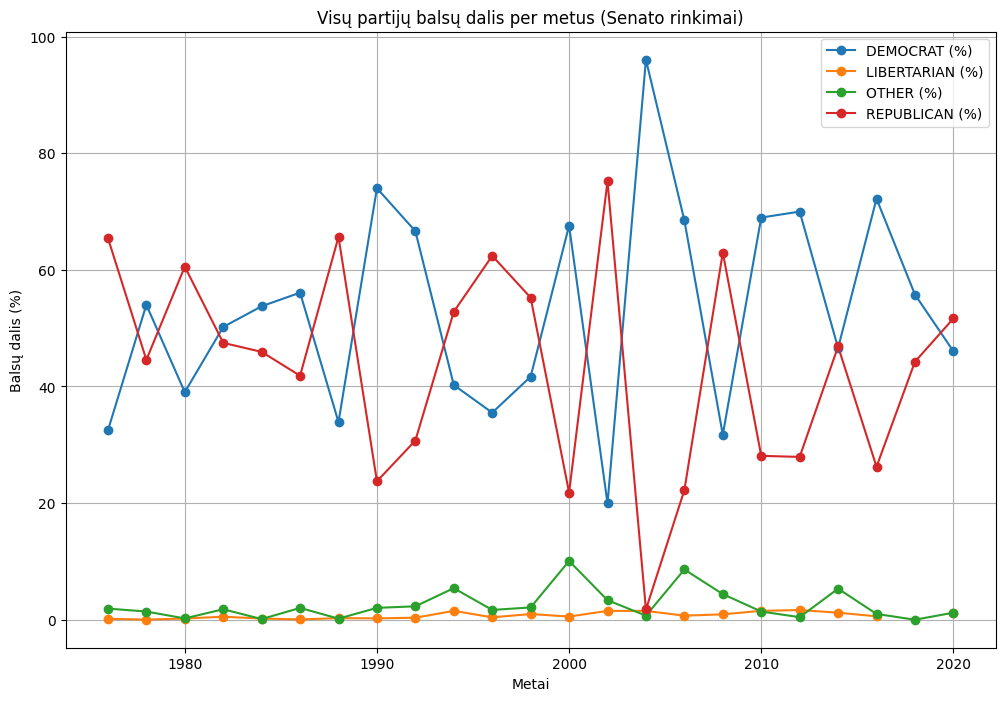

In [18]:
unikalus_senatas_iki_2020 = unikalus_senatas[unikalus_senatas["year"] <= 2020]

# Skaičiuojame balsų dalis procentais visoms partijoms
visu_partiju_populiarumas = (
    unikalus_senatas_iki_2020.groupby(["year", "party_simplified"])["candidatevotes"]
    .sum()
    .unstack()
)
visu_partiju_populiarumas_procentai = visu_partiju_populiarumas.div(visu_partiju_populiarumas.sum(axis=1), axis=0) * 100

# Vizualizacija
plt.figure(figsize=(12, 8))
for partija in visu_partiju_populiarumas_procentai.columns:
    plt.plot(visu_partiju_populiarumas_procentai.index, visu_partiju_populiarumas_procentai[partija], marker="o", label=f"{partija} (%)")

plt.title("Visų partijų balsų dalis per metus (Senato rinkimai)")
plt.xlabel("Metai")
plt.ylabel("Balsų dalis (%)")
plt.grid()
plt.legend()
plt.show()


Libertarų ir „Kitų“ partijų balsų dalis paprastai yra labai maža (dažniausiai mažiau nei 5%).
Trečiųjų partijų palaikymas yra nuolat mažas ir nekinta reikšmingai.

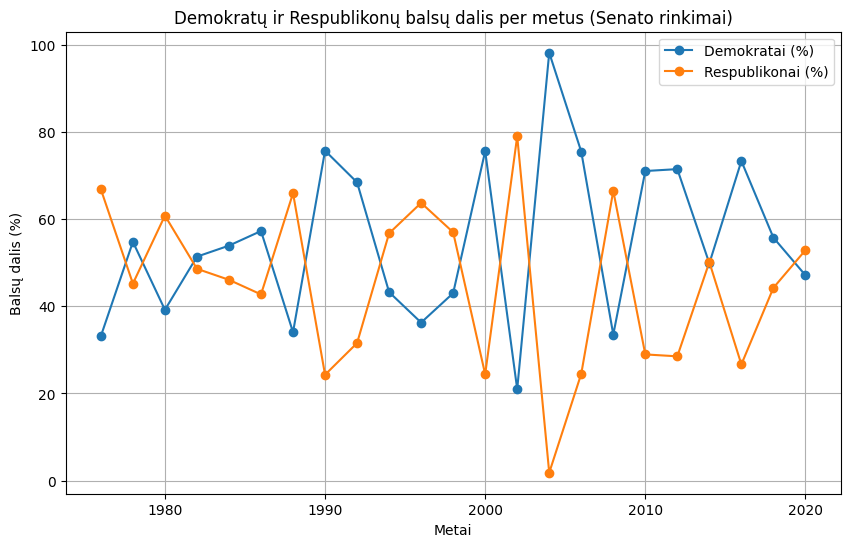

In [ ]:
unikalus_senatas_iki_2020 = unikalus_senatas[unikalus_senatas["year"] <= 2020]

# Filtruojame Demokratų ir Respublikonų partijas
partijos = ["DEMOCRAT", "REPUBLICAN"]
duomenys_partijos = unikalus_senatas_iki_2020[unikalus_senatas_iki_2020["party_simplified"].isin(partijos)]

# Skaičiuojame balsų dalis procentais
populiarumas = (
    duomenys_partijos.groupby(["year", "party_simplified"])["candidatevotes"]
    .sum()
    .unstack()
)
populiarumas_procentai = populiarumas.div(populiarumas.sum(axis=1), axis=0) * 100

# Vizualizacija
plt.figure(figsize=(10, 6))
plt.plot(populiarumas_procentai.index, populiarumas_procentai["DEMOCRAT"], marker="o", label="Demokratai (%)")
plt.plot(populiarumas_procentai.index, populiarumas_procentai["REPUBLICAN"], marker="o", label="Respublikonai (%)")
plt.title("Demokratų ir Respublikonų balsų dalis per metus (Senato rinkimai)")
plt.xlabel("Metai")
plt.ylabel("Balsų dalis (%)")
plt.grid()
plt.legend()
plt.show()

Demokratų ir Respublikonų partijos keičiasi vietomis kas kelerius metus.

Aiškiai matomas jų dominavimas rinkimuose, dažnai viršijantis 40–60% ribas.

Kai kuriais metais viena partija gauna didelį balsų procentą, o kitais metais atotrūkis sumažėja.

2008 m. Jungtinių Valstijų Senato rinkimai buvo didelis laimėjimas Demokratų partijai, ir didelę įtaką tam turėjo Baracko Obamos populiarumas. Rinkimai vyko tuo metu, kai ekonominė krizė.

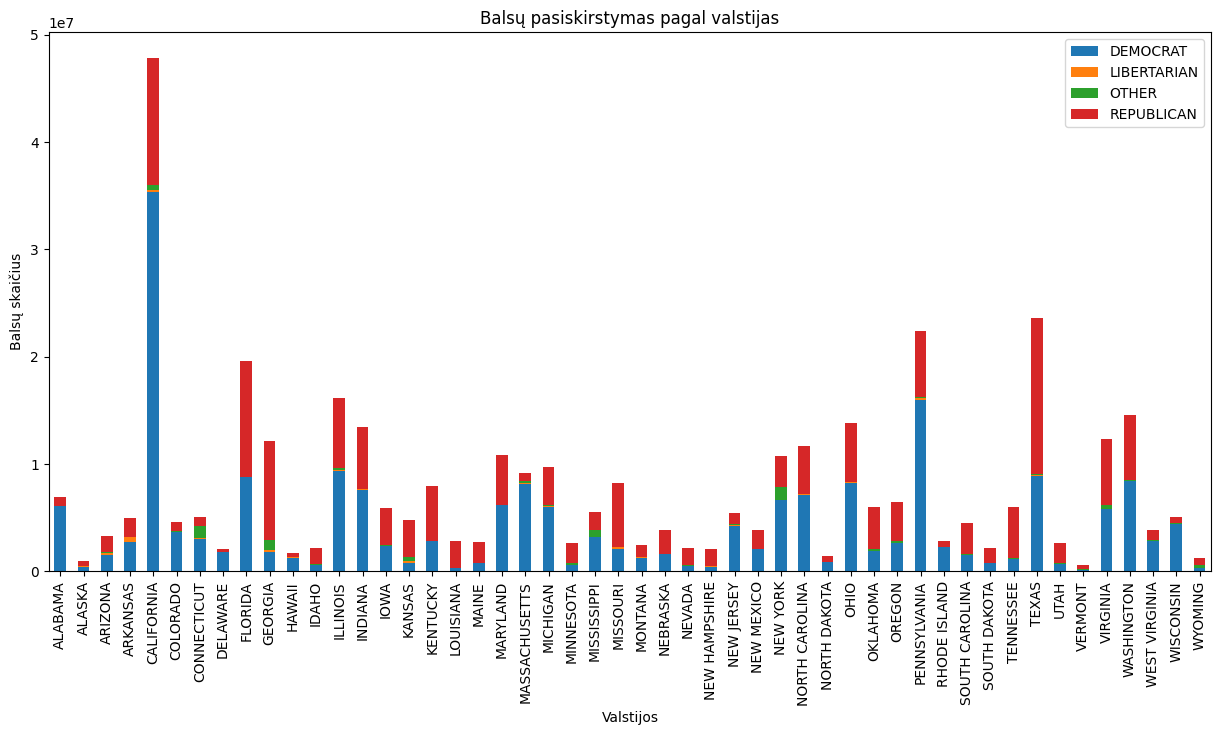

In [ ]:
state_votes = unikalus_senatas.groupby(["state", "party_simplified"])["candidatevotes"].sum().unstack()
state_votes.plot(kind="bar", stacked=True, figsize=(15, 7))
plt.title("Balsų pasiskirstymas pagal valstijas")
plt.xlabel("Valstijos")
plt.ylabel("Balsų skaičius")
plt.legend()
plt.show()

California yra akivaizdžiai pirmaujanti valstija pagal bendrą balsų skaičių, kuri sudaro didelę dalį demokratų ir respublikonų balsų.

Texas ir Florida taip pat pasižymi dideliu balsų skaičiumi, rodančiu šių valstijų strateginę svarbą.

Demokratų stipriosios valstijos apima California, New York, ir Illinois.

Respublikonų tvirtovės matomos Texas, Alabama, ir Tennessee.

Libertarianų ir kitų mažesnių partijų indėlis minimalus, bet pastebimas kai kuriose valstijose, pvz., New Mexico ir Oregon.

Respublikonai dominuoja pietinėse ir kaimiškose valstijose.

Demokratų palaikymas stipresnis šiaurės rytų ir vakarų pakrantėse.

Šis pasiskirstymas atitinka tradicinius politinius skirtumus tarp regionų.

California, Texas, ir Florida yra pagrindinės kovos arenos dėl jų didelio gyventojų skaičiaus ir balsų svarbos rinkimuose.

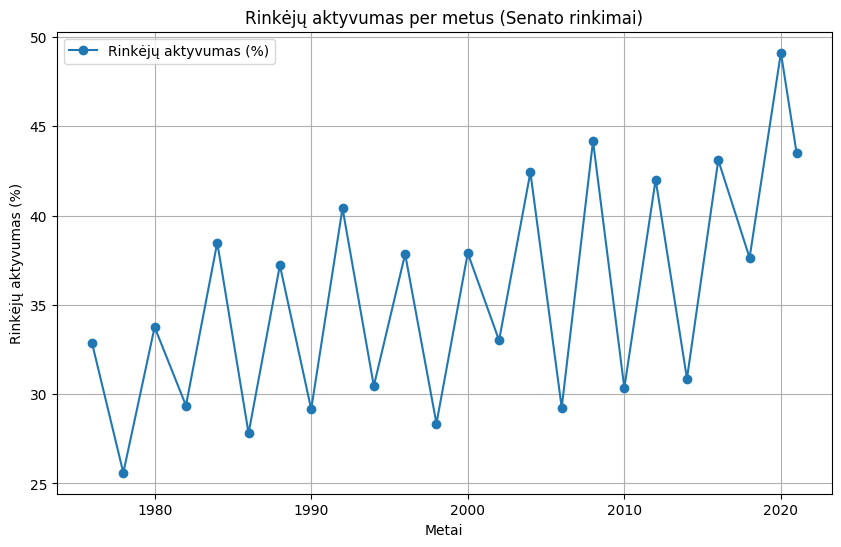

In [21]:
# Apskaičiuojame rinkėjų aktyvumą
senato_duomenys["rinkejai_aktyvumas"] = senato_duomenys["totalvotes"] / senato_duomenys["Populiacija_viso"]

# Grupavimas pagal metus
rinkejai_aktyvumas_per_metus = senato_duomenys.groupby("year")["rinkejai_aktyvumas"].mean()

# Vizualizacija
plt.figure(figsize=(10, 6))
plt.plot(rinkejai_aktyvumas_per_metus.index, rinkejai_aktyvumas_per_metus.values * 100, marker="o", label="Rinkėjų aktyvumas (%)")
plt.title("Rinkėjų aktyvumas per metus (Senato rinkimai)")
plt.xlabel("Metai")
plt.ylabel("Rinkėjų aktyvumas (%)")
plt.grid()
plt.legend()
plt.show()

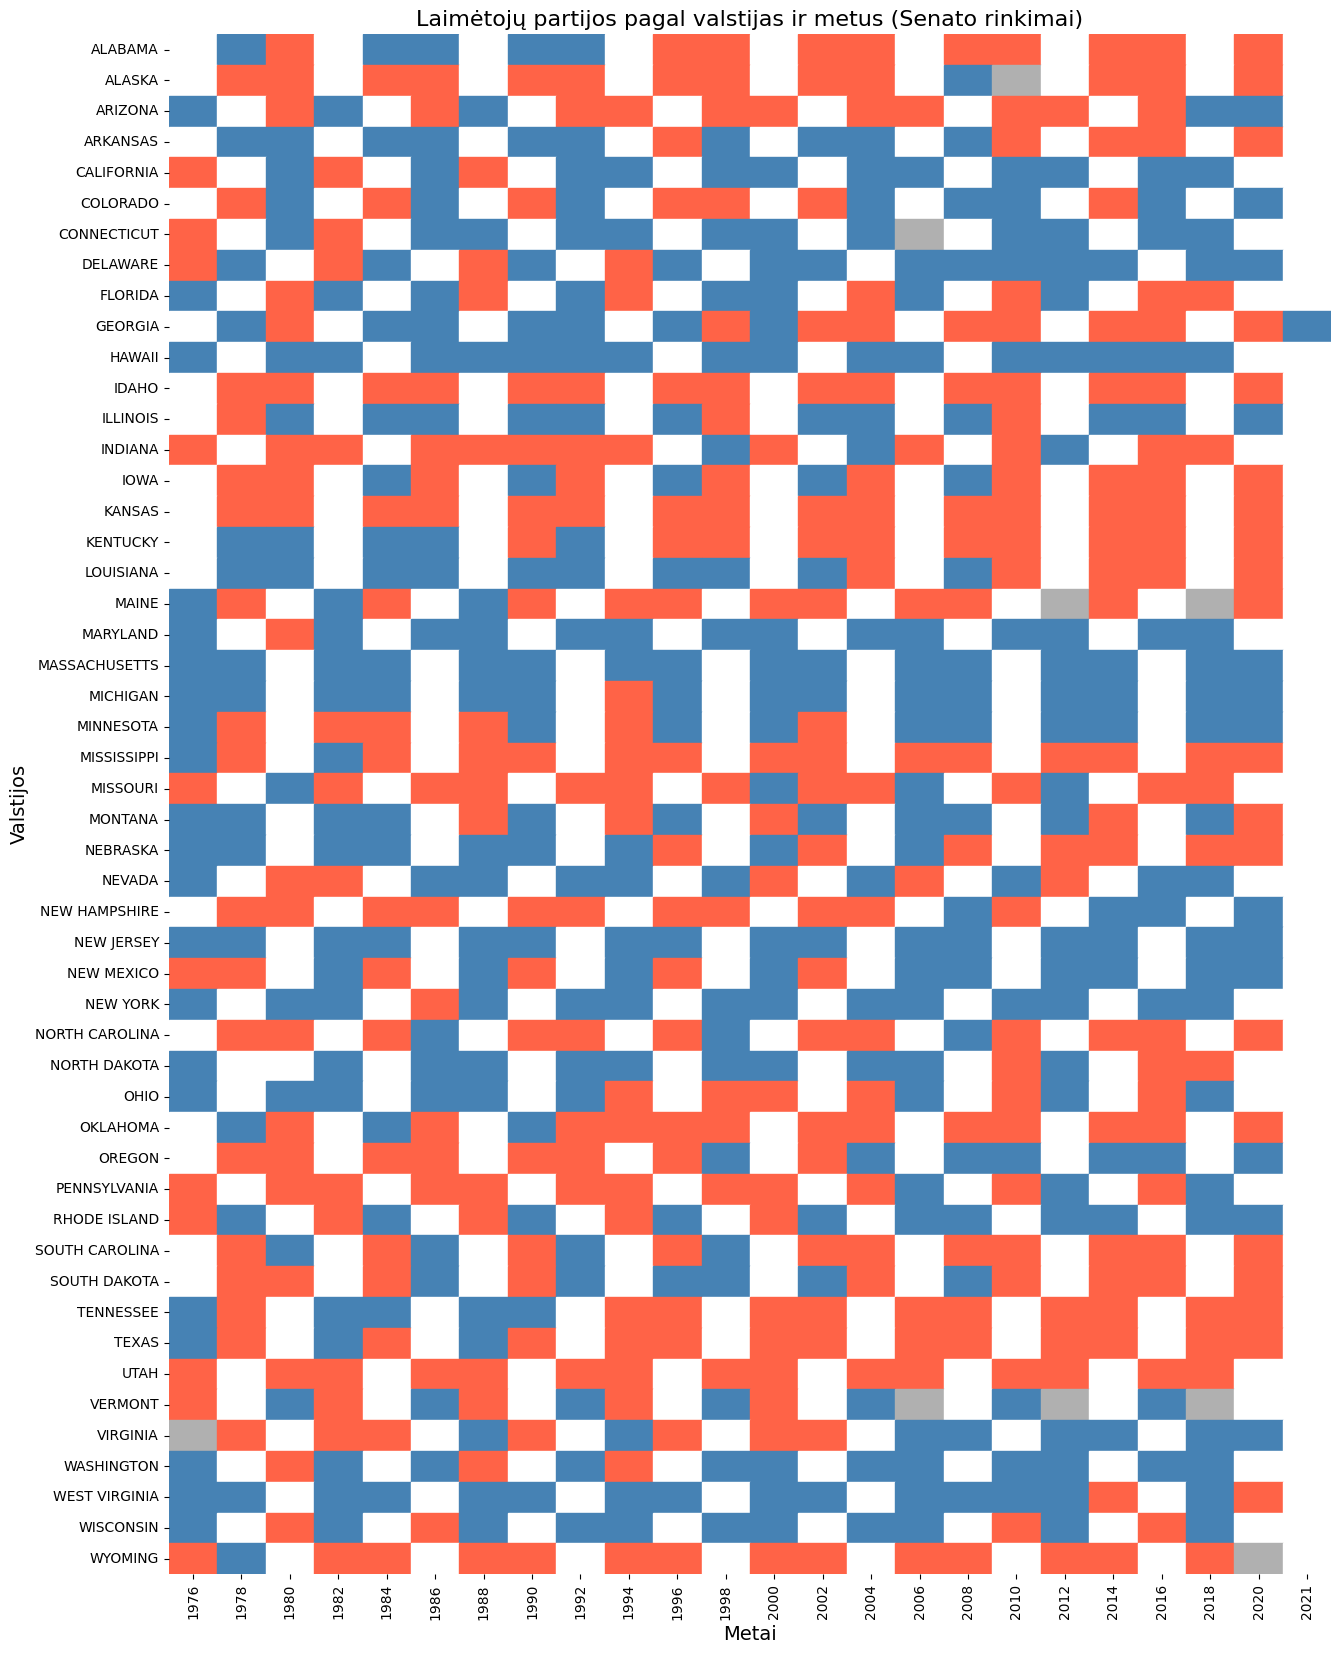

In [10]:
# Senato šilumos žemėlapis: Laimėtojų partijos pagal valstijas ir metus, remiantis daugiausia balsų gavusiais kandidatais
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Patikriname, ar duomenyse yra reikalingas stulpelis
if "candidatevotes" not in senato_duomenys.columns:
    print("Duomenų rinkinyje nėra stulpelio 'candidatevotes'. Įsitikinkite, kad jis yra įtrauktas.")
else:
    # Nustatome laimėtojus pagal valstijas ir metus, remiantis daugiausiai balsų gavusiais kandidatais
    laimetojai_senatas = senato_duomenys.loc[
        senato_duomenys.groupby(["state", "year"])["candidatevotes"].idxmax()
    ][["state", "year", "party_simplified"]]

    # Sukuriame šilumos žemėlapio duomenis
    zemelapio_duomenys_senatas = laimetojai_senatas.pivot(index="state", columns="year", values="party_simplified")

    # Partijų spalvų schema
    partiju_spalvos = {
        "DEMOCRAT": "#4682B4",      # Ryškesnė mėlyna
        "REPUBLICAN": "#FF6347",    # Ryškesnė raudona
        "OTHER": "#B0B0B0",         # Pilka kitiems
        None: "white"               # Balta, jei duomenų nėra
    }

    # Priskiriame spalvas kiekvienai partijai
    zemelapio_spalvos_senatas = zemelapio_duomenys_senatas.apply(lambda eil: eil.map(lambda x: partiju_spalvos.get(x, "white")), axis=1)
    rgb_zemelapis_senatas = zemelapio_spalvos_senatas.apply(lambda eil: eil.map(lambda x: mcolors.to_rgb(x)), axis=1)

    # Braižome šilumos žemėlapį
    fig, ax = plt.subplots(figsize=(15, 20))
    sns.heatmap(
        zemelapio_duomenys_senatas.isnull() * 0,
        cmap=mcolors.ListedColormap(["white"]),
        cbar=False,
        linewidths=0.5,
        linecolor="lightgray",
        ax=ax
    )

    for y in range(rgb_zemelapis_senatas.shape[0]):
        for x in range(rgb_zemelapis_senatas.shape[1]):
            spalva = rgb_zemelapis_senatas.iloc[y, x]
            ax.add_patch(plt.Rectangle((x, y), 1, 1, color=spalva))

    # Pavadinimai ir žymos
    plt.title("Laimėtojų partijos pagal valstijas ir metus (Senato rinkimai)", fontsize=16)
    plt.xlabel("Metai", fontsize=14)
    plt.ylabel("Valstijos", fontsize=14)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()


Respublikonai dominuoja pietuose ir vidurio vakaruose (pvz., Teksasas, Alabama).

Demokratai stiprūs šiaurės rytuose ir vakarinėje pakrantėje (pvz., Niujorkas, Kalifornija).

Pokyčiai laikui bėgant:
Po 1980-ųjų Respublikonų įtaka padidėjo, tačiau pakrantės išlieka Demokratų tvirtovės.

Kai kuriose valstijose, pvz., Virdžinijoje ar Kolorade, partijos keitėsi vietomis per laiką.

Rinkimų rezultatai atspindi stiprią regioninę politinę poliarizaciją.
Pietuose vyrauja Respublikonai, pakrantėse – Demokratai.

Dėl unikalios rinkimų struktūros matome struktūra kuri keičiasi kas trejus metus, baltos vietos nėra informacijos trūkumas, tiesiog nevyko rinkimai tais metais toje valstijoje.

C:\Users\Paulius\AppData\Local\Temp\ipykernel_20188\475247225.py:28: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  heatmap_colors_senate = swing_state_data_senate.fillna("NONE").applymap(party_colors.get)


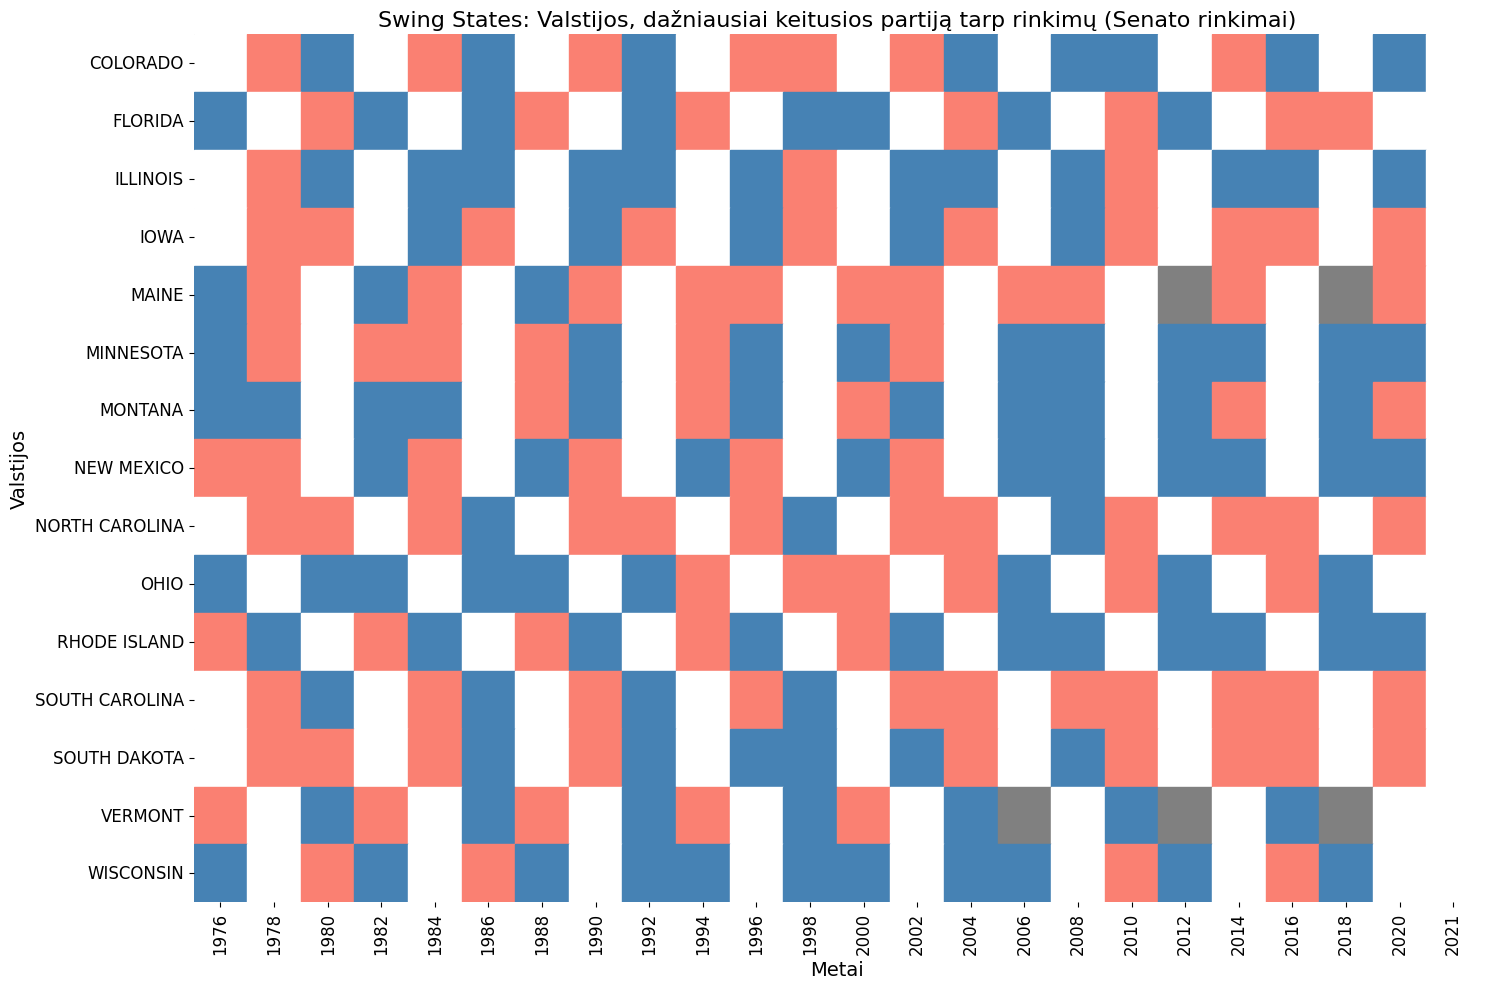

In [ ]:
# Grupavimas pagal valstijas ir metus, nustatant laimėtoją
senato_winners = senato_duomenys.loc[
    senato_duomenys.groupby(["state", "year"])["candidatevotes"].idxmax()
][["state", "year", "party_simplified"]]

# Sukuriame lentelę su valstijomis ir jų laimėtojomis partijomis per metus
pivot_senate_winners = senato_winners.pivot(index="state", columns="year", values="party_simplified")

# Identifikuojame valstijas, kurios pakeitė partiją tarp rinkimų
swing_states_senate = pivot_senate_winners.fillna("NONE").apply(lambda row: row != row.shift(), axis=1)

# Suskaičiuojame, kiek kartų kiekviena valstija pakeitė partiją
state_switch_count_senate = swing_states_senate.sum(axis=1)

# Pasirenkame tik valstijas, kurios dažniausiai keitė savo pasirinkimą
frequent_swing_states_senate = state_switch_count_senate[state_switch_count_senate > state_switch_count_senate.median()].index
swing_state_data_senate = pivot_senate_winners.loc[frequent_swing_states_senate]

# Sukuriame spalvų žemėlapį partijoms
party_colors = {
    "DEMOCRAT": "steelblue",
    "REPUBLICAN": "salmon",
    "OTHER": "gray",
    "NONE": "white"
}

# Naudojame `map` metodą, kad priskirtume spalvas tiesiai DataFrame langeliams
heatmap_colors_senate = swing_state_data_senate.fillna("NONE").applymap(party_colors.get)

# Braižome šilumos žemėlapį
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(
    swing_state_data_senate.notna(),  # Naudojame TRUE/FALSE formatą heatmap struktūrai
    cmap=mcolors.ListedColormap(list(party_colors.values())),
    cbar=False,
    linewidths=0.5,
    linecolor="gray",
    xticklabels=swing_state_data_senate.columns,
    yticklabels=swing_state_data_senate.index,
    ax=ax
)

# Užpildome langelius spalvomis
for y, row in enumerate(heatmap_colors_senate.values):
    for x, cell_color in enumerate(row):
        ax.add_patch(plt.Rectangle((x, y), 1, 1, color=cell_color))

# Grafiko detalės
plt.title("Swing States: Valstijos, dažniausiai keitusios partiją tarp rinkimų (Senato rinkimai)", fontsize=16)
plt.xlabel("Metai", fontsize=14)
plt.ylabel("Valstijos", fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

Šioje diagramoje matome tokias valstijas kaip Florida, Ohio, North Carolina, Iowa, kurios dažnai keitė savo palaikomą partiją. Šios valstijos yra laikomos pagrindinėmis „swing states“ dėl jų politinio nepastovumo.

Kitos valstijos, kaip Colorado ir Wisconsin, taip pat dažnai keitė dominuojančias partijas tarp „Democrat“ (mėlyna) ir „Republican“ (raudona).

Kai kurios valstijos, kaip New Mexico, ilgą laiką išliko pastovios, tačiau keitė savo partinę priklausomybę tam tikruose rinkimų laikotarpiuose.

Diagramoje atsispindi bendra tendencija, kai kai kurios valstijos dažniausiai išlieka pastovios savo politinėse pažiūrose, o kitos nuolat keičiasi. Šios politinės svyravimo tendencijos dažnai nulemia Senato galios pasiskirstymą tarp partijų.

Šios „swing states“ yra itin svarbios, nes jų svyravimai gali lemti, kuri partija kontroliuos Senatą. Pavyzdžiui, Ohio ir Florida yra dažnai pabrėžiamos kaip itin reikšmingos.